Example: predict **Species** in the **Iris** dataset using Support Vector Machine. 


*   train the model using 80% and evaluate it based on 20% testset
*   apply svm for different kernels
*   validate the result in 100 MC runs
*   Recommend the type of flower for the first sample in the dataset using the best classifier 





In [4]:
import pandas as pd
from pandas import read_csv
dataset= pd.read_csv('DataSets/Iris.csv')
dataset.head(6)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
X=dataset.drop('Species',axis=1) # input variables 
y=dataset['Species']  # target variable=output variable 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3) # testset is 30%


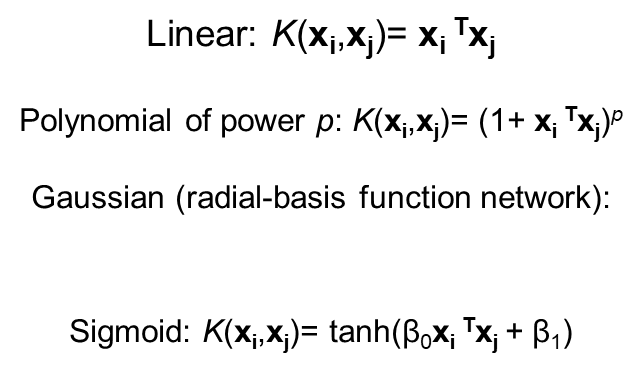

# kernel functions in SVC
1.  (kernel='linear')===linear function 
2.  (kernel='poly')===Polynomial function 
3.  (kernel='rbf')===Gaussian function --- defualt 
4.  (kernel='sigmoid')===Sigmoid function

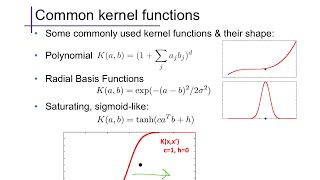

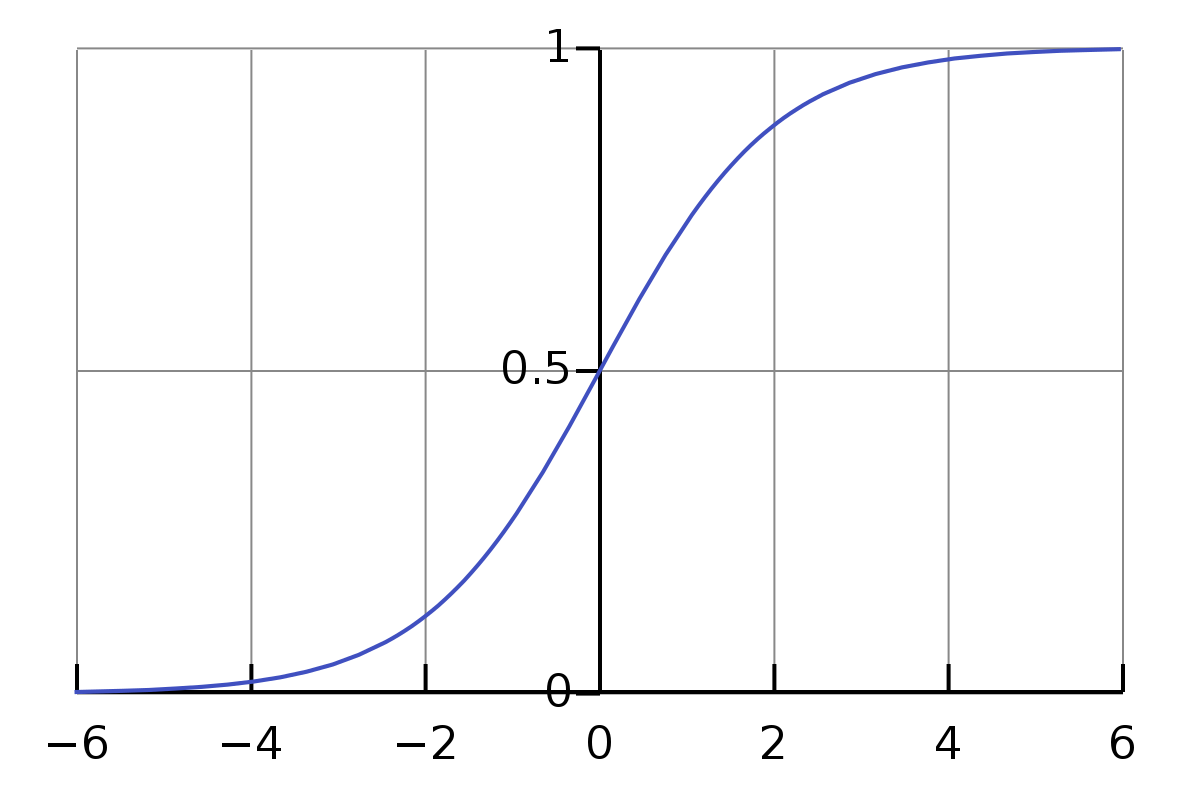

In [6]:
from sklearn.svm import SVC  # svm for classification 
SVC()


SVC()

Evaluate the performance of SVM for different kernel where the same datasets are used. 



In [7]:
from sklearn.metrics import accuracy_score 
acc=[]
ker=['linear', 'poly', 'rbf', 'sigmoid']
for i in ker:
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) # testset is 30%
  model = SVC(kernel=i)
  model.fit(X_train, y_train)
  pred_svc = model.predict(X_test)
  accu=accuracy_score(y_test, pred_svc)
  acc.append(accu)
 
print(acc)



[0.9777777777777777, 0.9333333333333333, 0.9555555555555556, 0.28888888888888886]


Validate the result of performance for different kernels of svc in 100 MC runs

In [8]:
import numpy as np
acc=[]
ker=['linear', 'poly', 'rbf', 'sigmoid']
for i in ker:
  mc_acc=[]
  for j in range(100):
    
   X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) # testset is 30%
   model = SVC(kernel=i,C=1.1)
   model.fit(X_train, y_train)
   pred_svc = model.predict(X_test)
   accu=accuracy_score(y_test, pred_svc)  # 
   mc_acc.append(accu) # append accuracy score in each MC run

  acc.append(np.mean(mc_acc)) # mean of accuracy and append it in accuracy in kernel array
 
print(acc)

[0.9735555555555555, 0.968, 0.9564444444444444, 0.24955555555555547]


# conclusion: svm with linear kernel provide us the best classifier which can be exploited for recommender system

In [9]:
#Recommend the type of flower for the last sample in the dataset using the best classifier
best = SVC(kernel='linear')
best.fit(X, y)
x_input=X.tail(1)
recom = best.predict(x_input)
print('prediction',recom)


prediction ['Iris-virginica']


#Example 2: 
1.  Use **winequality-red** dataset, apply SVC to predict '**quality**' variable for different kernels in 100 mc runs. Specify the best kernel
2.  redo modeling for Naive Bayes and Logisitic regression
3.  Compare all classifiers and specify the best among all 




In [10]:
import pandas as pd
dataset= pd.read_csv('DataSets/winequality-red.csv')
dataset.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
X=dataset.drop('quality',axis=1)
y=dataset['quality'] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) # testset is 30%
y.value_counts()
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
import numpy as np
acc=[]
ker=['linear', 'poly', 'rbf', 'sigmoid']
for i in ker:
  mc_acc=[]
  for j in range(10):
    
   X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) # testset is 30%
   model = SVC(kernel=i,C=1.1)
   model.fit(X_train, y_train)
   pred_svc = model.predict(X_test)
   accu=accuracy_score(y_test, pred_svc)  # 
   mc_acc.append(accu) # append accuracy score in each MC run

  acc.append(np.mean(mc_acc)) # mean of accuracy and append it in accuracy in kernel array
 
print(acc)

**conclusion**: the best svc is linear, since it has the highest accuracy

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
# solution part 2 ; apply NB and Logistic reg in one cell
import numpy as np
acc=[]
ker=['linear', 'poly', 'rbf', 'sigmoid']
for i in ker:
  mc_acc=[]
  for j in range(10):
    
   X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) # testset is 30%
   model = SVC(kernel=i,C=1.1)
   model.fit(X_train, y_train)
   pred_svc = model.predict(X_test)
   accu=accuracy_score(y_test, pred_svc)  # 
   mc_acc.append(accu) # append accuracy score in each MC run

  acc.append(np.mean(mc_acc)) # mean of accuracy and append it in accuracy in kernel array
 
print(acc)



[0.9844444444444445, 0.9777777777777779, 0.9755555555555556, 0.2333333333333333]


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred_mlr)
print(cm)
print(y.value_counts())

NameError: name 'pred_mlr' is not defined

**Regression analysis**:  ***RMSE*** and **R_score** can be used to evaluate the model

**Classification**: ***Accuracy***, Recall, Precision, F1 score are used to evaluate the classifiers 

In [ ]:
[np.mean(acc_svc),np.mean(acc_gnb),np.mean(acc_mlr)]

[0.575, 0.56875, 0.5729166666666666]

In [ ]:
** final result**: the best model is SVC with linear kernel

#Example 3:
Apply SVM to accomplish the task of regression on **boston** dataset, where **medv** is the output variable, evaluate the performance of model in 100 mc runs. 



In [ ]:
import pandas as pd
import seaborn as sns
  
from sklearn.metrics import mean_squared_error
from math import sqrt
 
from sklearn.svm import SVR  # for regression analysis
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import time
 

# New Section

In [ ]:
import pandas as pd
dataset= pd.read_csv('DataSets/boston_house_prices.csv')
dataset.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
#inputs=['calories','protein','fat','sodium','fiber']

In [ ]:
X=dataset.drop('MEDV',axis=1)
y=dataset['MEDV']
from sklearn.model_selection import train_test_split 


The useful svm kernels for regression analysis: linear, rbf and poly

In [ ]:
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly=SVR(kernel='poly')

lr = LinearRegression()

In [ ]:
inputs=['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS'	,'RAD'	,'TAX',	'PTRATIO',	'B',	'LSTAT']

In [ ]:
from math import sqrt

In [ ]:
def launch_model(name,model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train[inputs], y_train)
    y_pred = model.predict(X_test[inputs])
    print ('RMSE test', sqrt(mean_squared_error(y_test, y_pred)))
     
 

In [ ]:

results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - linear')
print ('-----------')
results.append(launch_model('SVR - linear', svr_lin, X_train, y_train, X_test, y_test))
print ('-----------')
print (' linear Regresion')
print ('-----------')
results.append(launch_model('linear Regresion ', lr, X_train, y_train, X_test, y_test))

print ('-----------')
print ('SVR poly')
print ('-----------')
results.append(launch_model('SVR - poly', svr_poly, X_train, y_train, X_test, y_test))


-----------
SVR - RBF
-----------


KeyError: "None of [Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',\n       'PTRATIO', 'B', 'LSTAT'],\n      dtype='object')] are in the [columns]"

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) # testset is 30%
results = []
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
results.append(launch_model('SVR - linear', svr_lin, X_train, y_train, X_test, y_test))
results.append(launch_model('linear Regresion ', lr, X_train, y_train, X_test, y_test))
results.append(launch_model('SVR - poly', svr_poly, X_train, y_train, X_test, y_test))
results

RMSE test 9.226704188712803
RMSE test 5.563238304121481
RMSE test 5.143606279447714
RMSE test 9.270258469588372


[None, None, None, None]

#Conclusion:
 since SVR with linear kernel has the lowest RMSE, there it is the best regression model.

# validate the above result. 

In [ ]:
from numpy import mean

In [ ]:
def launch_model(name,model, X, y):
  RMSE=[]
  for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) # testset is 30%
    model.fit(X_train[inputs], y_train)
    y_pred = model.predict(X_test[inputs])
    rmse=sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
  print ('RMSE test', mean(RMSE))

In [ ]:
results = []
results.append(launch_model('SVR - RBF', svr_rbf, X,y))
results.append(launch_model('SVR - linear', svr_lin, X,y))
results.append(launch_model('linear Regresion ', lr, X,y))
results.append(launch_model('SVR - poly', svr_poly, X,y))
results

RMSE test 8.523273345613799
RMSE test 5.02157730805817
RMSE test 4.849809751171275
RMSE test 8.28838605846173


[None, None, None, None]

# design a recommender system to predict the medv based on the best model, test your system with the first row in the original dataset. 

In [ ]:
lr.fit(X, y)
x_new=X.head(1)
y_pred = lr.predict(x_new)
print(y_pred)
x_new
print(y.head(1))

[30.00384338]
0    24.0
Name: MEDV, dtype: float64


# redo validation step for the pervious example using 5-fold cross validation technique. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


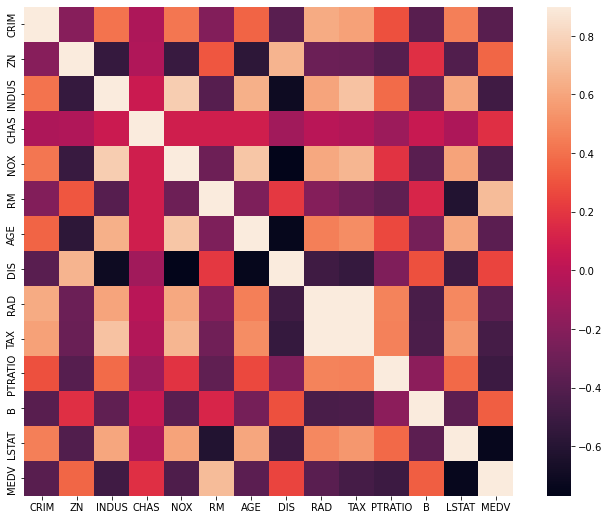

In [ ]:
import matplotlib.pyplotd as plt
import seaborn as sns
corrmat = dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
corrmat

#Example: fetch 3 years dataset from yahoo finance for AAPL stock, apply regression models to predict **close price**, to do so, use 30% of the data as the testset and 70% for trainset. measure the evaluation of model using RMSE. Recommend the close price for the next day based on the best model. 

In [ ]:
!pip install yfinance 


  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=76a81d3dc3c64de80303029261aa7aac3fef03c7263d0b31b170ea24275dabe1
  Stored in directory: c:\users\sunil\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [ ]:
import yfinance as yf

In [ ]:
# data=yf.download('AAPL',period = '1y')
data=yf.download('TATASTEEL.NS',period = '1y')
data.columns=['Open',	'High',	'Low',	'Close',	'Adj_Close',	'Volume']
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2021-03-09,745.000000,750.950012,702.250000,706.750000,691.280273,19556438
2021-03-10,714.900024,729.950012,703.049988,724.500000,708.641724,19685860
2021-03-12,740.000000,745.000000,714.000000,719.950012,704.191345,16121409
2021-03-15,722.000000,739.000000,715.049988,736.400024,720.281311,15542999
2021-03-16,740.099976,740.099976,719.200012,724.049988,708.201599,12569998


In [ ]:
data.head(6)

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2018-11-12,49.750000,49.962502,48.447498,48.542500,47.123962,204542000
2018-11-13,47.907501,49.294998,47.862499,48.057499,46.653133,187531600
2018-11-14,48.474998,48.619999,46.482498,46.700001,45.335308,243204000
2018-11-15,47.097500,47.992500,46.724998,47.852501,46.454124,185915200
2018-11-16,47.625000,48.742500,47.365002,48.382500,46.968643,147713200
2018-11-19,47.500000,47.674999,46.247501,46.465000,45.107174,167701200


In [ ]:
I=['High', 'Low','Open','Volume']
O=['Close']
X=data[I]
y=data[O]

In [ ]:
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly=SVR(kernel='poly')

lr = LinearRegression()

In [ ]:
def launch_model(name,model, X, y):
  RMSE=[]
  for i in range(1):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) # testset is 30%
    model.fit(X_train[I], y_train)
    y_pred = model.predict(X_test[I])
    rmse=sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
  print ('RMSE test', mean(RMSE))

In [ ]:
from sklearn.model_selection import train_test_split 
from numpy import mean

In [ ]:
results = []
results.append(launch_model('SVR - RBF', svr_rbf, X,y))
# results.append(launch_model('SVR - linear', svr_lin, X,y))
results.append(launch_model('linear Regresion ', lr, X,y))
results.append(launch_model('SVR - poly', svr_poly, X,y))
results

NameError: name 'launch_model' is not defined

#Example: 
fetch 1 years dataset from yahoo finance for TSLA stock, apply regression models to predict close price, to do so, use 40% of the data as the testset and 60% for trainset. measure the evaluation of model using RMSE.  

In [ ]:
data=yf.download('TSLA',period = '1y')
data.columns=['Open',	'High',	'Low',	'Close',	'Adj_Close',	'Volume']
data.head()

In [ ]:
I=['High', 'Low','Open','Volume']
O=['Close']
X=data[I]
y=data[O]

In [ ]:
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly=SVR(kernel='poly')

lr = LinearRegression()

In [ ]:
def launch_model(name,model, X, y):
  RMSE=[]
  for i in range(1):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4) # testset is 30%
    model.fit(X_train[I], y_train)
    y_pred = model.predict(X_test[I])
    rmse=sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
  print ('RMSE test', mean(RMSE))

In [ ]:
results = []
results.append(launch_model('SVR - RBF', svr_rbf, X,y))
results.append(launch_model('SVR - linear', svr_lin, X,y))
results.append(launch_model('linear Regresion ', lr, X,y))
results.append(launch_model('SVR - poly', svr_poly, X,y))
results

# Classification example: 

use the dataset in the link:

https://data.gov.ie/dataset/pavilions11

apply svm classifiers to predict the variable 'type', using 80% as the trainset. do a comparative anlaytics to comapre the results versus NB and logistic regression. 


In [ ]:
from pandas import read_csv
data=read_csv('/content/Parks_and_Recreation_Map.csv')
data.head()
data=data.drop(['X',	'Y',	'OBJECTID','Name','Club',	'Address',	'Telephone','Website','Booking_Information','AEDAvailable',
                'DressingsRooms',	'created_user',	'created_date',	'last_edited_user',	'last_edited_date'], axis=1)
data1=data.dropna()  # to remove missing values
data.shape
data1.shape

(36, 5)

In [ ]:
I=['CCTV',	'SDCC_Owned',	'WheelchairAccessible',	'ShowerFacilities']
O=['Type']
X=data1[I]
y=data1[O]
y.value_counts()
X.head() 

,CCTV,SDCC_Owned,WheelchairAccessible,ShowerFacilities
0,No,No,Yes,No
1,No,Yes,Yes,Yes
2,No,Yes,No,No
3,No,No,No,Yes
5,No,Yes,No,Yes


In [ ]:
# encode class values as integers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(X['CCTV'])
X1=encoder.transform(X['CCTV'])

encoder.fit(X['SDCC_Owned'])
X2=encoder.transform(X['SDCC_Owned'])

encoder.fit(X['WheelchairAccessible'])
X3=encoder.transform(X['WheelchairAccessible'])


encoder.fit(X['ShowerFacilities'])
X4=encoder.transform(X['ShowerFacilities'])
 
 
encoder.fit(y)
y = encoder.transform(y)


In [ ]:
from pandas import  DataFrame
X=DataFrame([X1,X2,X3,X4])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,1,1,0,...,0,1,0,1,1,0,0,0,0,0
2,1,1,0,0,0,0,1,1,0,0,...,0,0,0,1,1,0,1,0,0,1
3,0,1,0,1,1,0,1,1,0,0,...,0,0,0,1,1,0,1,0,1,1


# Naive Bayes 


In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
cnb=CategoricalNB()
cnb.fit(X,y)